## Caracterização meteorologica da área de estudo 

Nessa atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

1. Meteorologia de superfície 
2. Meteorologia upperair ou sondagem/ perfiel da atmosfera
3. Superfície - Albedo, razão de Bowen e Rugosidade

## Meteorologia de superfície 
Analisaremos os dados metar (estação meteorológia em aeroportos)

Os dados estarão na pasta inputs/meteoSuperficie com nomenclatura metar.csv (colocar as tabelas na pasta inputs como pasta meteoSuperficie)

In [3]:
# Selecionar arquivo para análise 
import os

# Pegando o caminho do diretório que estou  
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório 
metSuperficiePath = rootPath + '\\inputs\\meteoSuperficie'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório 
files = os.listdir(metSuperficiePath)
print(files) 

C:\Users\Carlos Suganuma - VB\Documents\GitHub\ENS5173_202401
C:\Users\Carlos Suganuma - VB\Documents\GitHub\ENS5173_202401\inputs\meteoSuperficie
['metar.csv']


In [4]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis  pw   relh  
0     1009.658428  25.0    22.0  NaN   0  83.44  
1     1009.654835  25.0    22.0  NaN   0  83.44

In [5]:

# Criar uma coluna com Datetime dos dados
# Criar uma coluna de data e hora combinando colunas separadas 
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0,69.14,2023-12-31 21:00:00


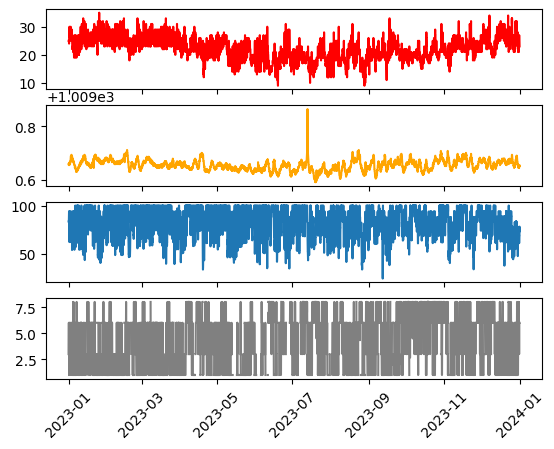

In [7]:
# Analisando os dados através de figuras 
import matplotlib.pyplot as plt

ig,ax = plt.subplots(4,sharex=True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'],color='red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'],color='orange')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

## Boxplot 

o percentil 95 da temperatura é 31.0
o percentil 95 da pressão é 1009.696761
o percentil 95 da altura é 100.0
o percentil 95 da cobertura de nuvem é 8.0


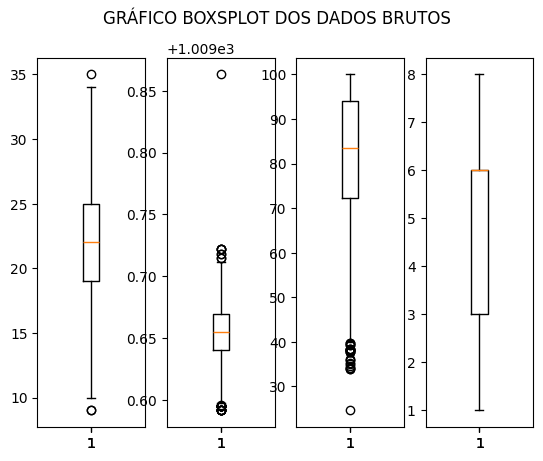

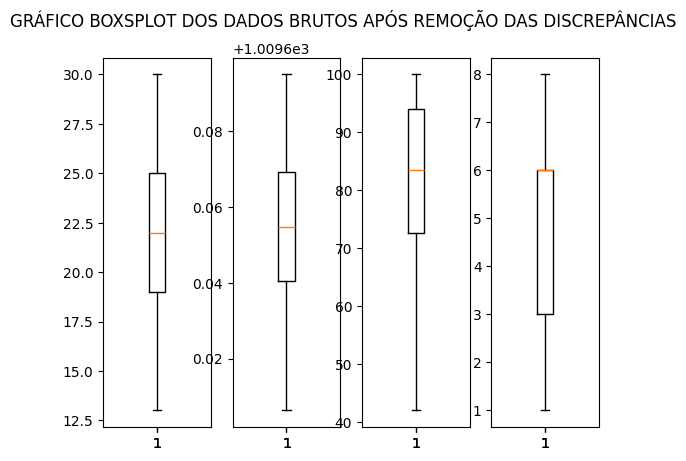

In [9]:
import numpy as np
# fazendo box plot das variáveis
fig,ax = plt.subplots(1,4,sharex=True)
fig.suptitle('GRÁFICO BOXSPLOT DOS DADOS BRUTOS')
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])
ax[3].tick_params(axis='x')

#removendo valores acima do percentil 95°
temp99 = np.percentile(metSuperficie['temp'],99)
print('o percentil 95 da temperatura é ' +str(temp99))
p99 = np.percentile(metSuperficie['p'],99)
print('o percentil 95 da pressão é ' +str(p99))
relh99 = np.percentile(metSuperficie['relh'],99)
print('o percentil 95 da altura é ' +str(relh99))
cco99 = np.nanpercentile(metSuperficie['cco'],99)
print('o percentil 95 da cobertura de nuvem é ' +str(cco99))
fig,ax = plt.subplots(1,4,sharex=True)
fig.suptitle('GRÁFICO BOXSPLOT DOS DADOS BRUTOS APÓS REMOÇÃO DAS DISCREPÂNCIAS')
ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp']<temp99) & (metSuperficie['temp']>np.percentile(metSuperficie['temp'],0.5))])
ax[1].boxplot(metSuperficie['p'][(metSuperficie['p']<p99) & (metSuperficie['p']>np.percentile(metSuperficie['p'],0.5))])
ax[2].boxplot(metSuperficie['relh'][(metSuperficie['relh']>np.percentile(metSuperficie['relh'],0.5))])
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])
ax[3].tick_params(axis='x')
# cada parte da atmosfera é instavel, estável ou neutra --> calcular gradiente de temperatura 
# vermelho instável, preta neutra, azul estável 
# matplotplotlib, com o link q está no moodle 



In [ ]:
#fazendo box plot das médias mensais
metSuperficie.set_index('datetime', inplace=True)
fig,ax = plt.subplots(1,4,sharex=True)
fig.suptitle('GRÁFICO BOXSPLOT DAS MÉDIAS MENSAIS')
ax[0].boxplot(metSuperficie.resample('M').mean()['temp'])
ax[1].boxplot(metSuperficie.resample('M').mean()['p'])
ax[2].boxplot(metSuperficie.resample('M').mean()['relh'])
ax[3].boxplot(metSuperficie.resample('M').mean()['cco'][~np.isnan(metSuperficie['cco'])])

C:\Users\Carlos Suganuma - VB\AppData\Local\Temp\ipykernel_12312\4289732075.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\Carlos Suganuma - VB\AppData\Local\Temp\ipykernel_12312\4289732075.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()
C:\Users\Carlos Suganuma - VB\AppData\Local\Temp\ipykernel_12312\4289732075.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  max_mensal = metSuperficie.resample('M').max()


            day  month  year  hour  ct   wd   ws      hc  ccp  cco  \
datetime                                                             
2023-01-31    1      1  2023     0 NaN  0.0  0.0  274.32  1.0  1.0   
2023-02-28    1      2  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-03-31    1      3  2023     0 NaN  0.0  0.0  182.88  1.0  1.0   
2023-04-30    1      4  2023     0 NaN  0.0  0.0  243.84  1.0  1.0   
2023-05-31    1      5  2023     0 NaN  0.0  0.0  152.40  1.0  1.0   
2023-06-30    1      6  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-07-31    1      7  2023     0 NaN  0.0  0.0   76.20  1.0  1.0   
2023-08-31    1      8  2023     0 NaN  0.0  0.0   45.72  1.0  1.0   
2023-09-30    1      9  2023     0 NaN  0.0  0.0   45.72  1.0  1.0   
2023-10-31    1     10  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-11-30    1     11  2023     0 NaN  0.0  0.0  152.40  1.0  1.0   
2023-12-31    1     12  2023     0 NaN  0.0  0.0  182.88  1.0  1.0   

                   

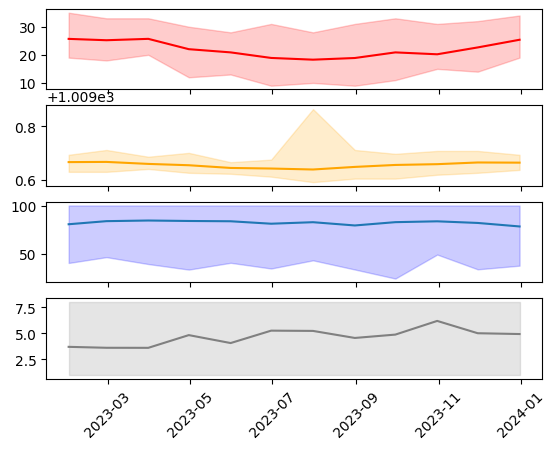

In [58]:
#Limites de sergurança, criar mancha de max e min no gráfico função fill_between
# Estatísticas dos dados
# Calculando a média, o mínimo e o máximo mensais
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()
max_mensal = metSuperficie.resample('M').max()

# Plotando figura após fazer a média mensal
fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(media_mensal.index,media_mensal['temp'],color='red')
ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='red', alpha=0.2)

ax[1].plot(media_mensal.index,media_mensal['p'],color='orange')
ax[1].fill_between(media_mensal.index, min_mensal['p'], max_mensal['p'], color='orange', alpha=0.2)

ax[2].plot(media_mensal.index,media_mensal['relh'])
ax[2].fill_between(media_mensal.index, min_mensal['relh'], max_mensal['relh'], color='blue', alpha=0.2)

ax[3].plot(media_mensal.index,media_mensal['cco'],color='gray')
ax[3].fill_between(media_mensal.index, min_mensal['cco'], max_mensal['cco'], color='gray', alpha=0.2)

ax[3].tick_params(axis='x', rotation=45)

# Imprimindo os valores mínimos mensais
print(min_mensal)

# Imprimindo os valores máximos mensais
print(max_mensal)


In [ ]:
#criar mancha de max e min no gráfico função fil_between

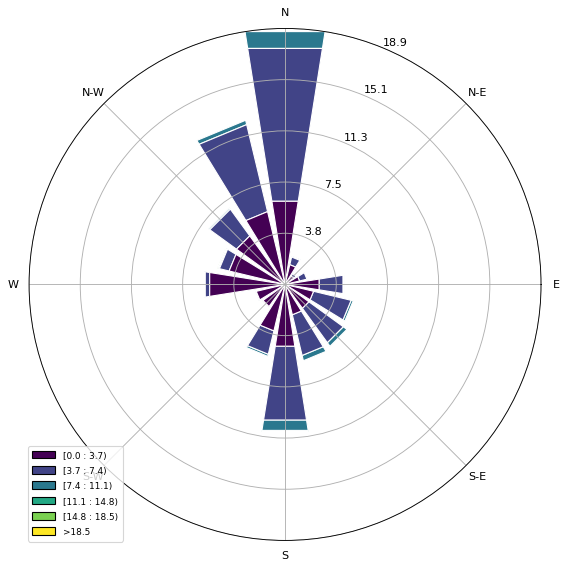

In [59]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

## Análise upperair/sondagem/perfil da atmosfera
Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

No dia 2023-01-12 00:00:00 a altura da camada limite é de 1333.0m
No dia 2023-01-12 12:00:00 a altura da camada limite é de 266m
No dia 2023-12-09 00:00:00 a altura da camada limite é de 1678m
No dia 2023-12-09 12:00:00 a altura da camada limite é de 2574m
No dia 2023-01-17 00:00:00 a altura da camada limite é de 1230.0m
No dia 2023-01-17 12:00:00 a altura da camada limite é de 7415m
No dia 2023-01-05 00:00:00 a altura da camada limite é de 3580m
No dia 2023-01-05 12:00:00 a altura da camada limite é de 2807.0m
No dia 2023-02-23 00:00:00 a altura da camada limite é de 2365m
No dia 2023-02-23 12:00:00 a altura da camada limite é de 591.0m
No dia 2023-08-25 00:00:00 a altura da camada limite é de 1624.0m
No dia 2023-08-25 12:00:00 a altura da camada limite é de 1569m
No dia 2023-08-23 00:00:00 a altura da camada limite é de 49.0m
No dia 2023-08-23 12:00:00 a altura da camada limite é de 2897m
No dia 2023-06-19 00:00:00 a altura da camada limite é de 1408m
No dia 2023-06-19 12:00:00 a alt

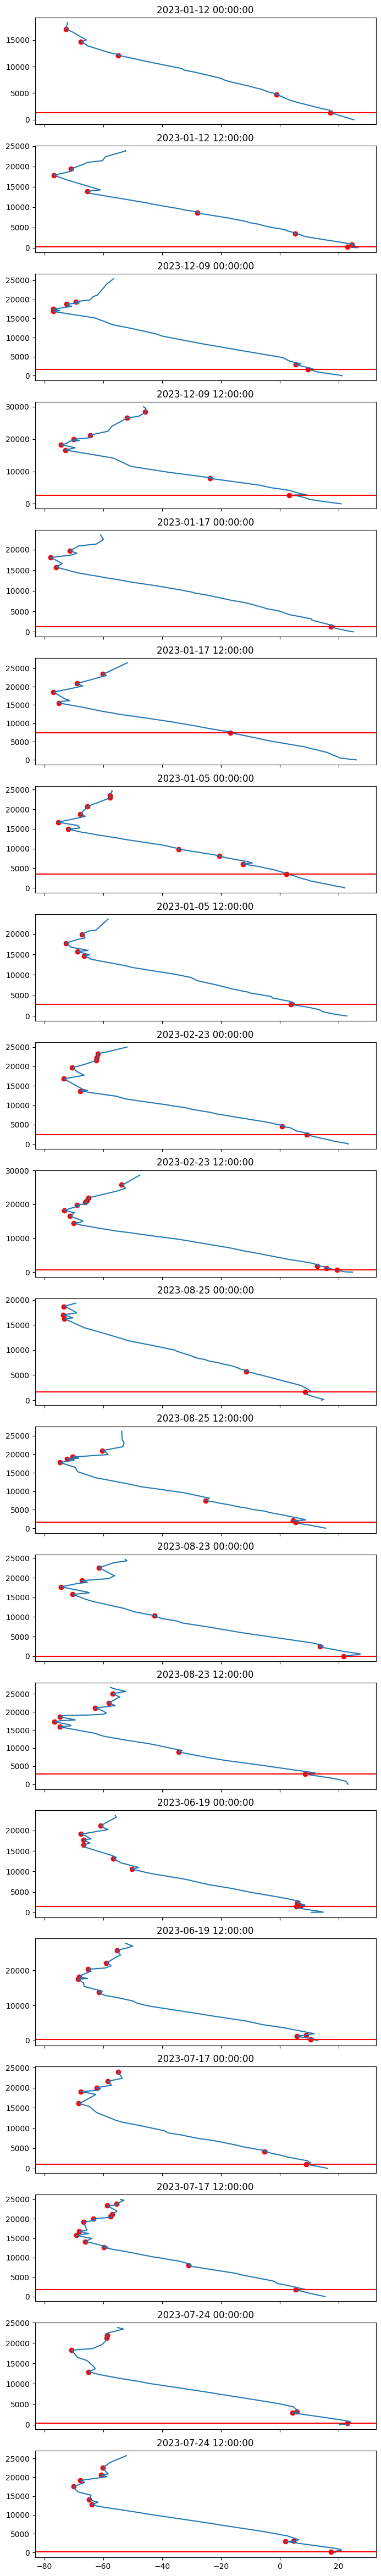

In [60]:
#coletar dados do siphon
from datetime import datetime
import random
from siphon.simplewebservice.wyoming import WyomingUpperAir

# local da análise
station = 'SBFL'
fig,ax = plt.subplots(20,sharex=True, figsize=(8, 60))

#Gerado aleatoriamente pelo código acima
dia =[12, 9, 17, 5, 23, 25, 23, 19, 17, 24] 
mes =[1, 12, 1, 1, 2, 8, 8, 6, 7, 7]
index = 0
for i in range(10):
    index = index+1
    for u in range(2):
        hora = [0, 12]
        date = datetime(2023, mes[i], dia[i], hora[u])
        df = WyomingUpperAir.request_data(date, station)
        if u==1:
            index = index+1
            
        #plotando os dados
        ax[index-1].plot(df['temperature'],df['height'])
        ax[index-1].set_title(date)
        
        #identificando pontos de inversão térmica
        inversao = []
        for num in range(1, len(df['temperature']) - 1):
            if df['temperature'][num+1] > df['temperature'][num] and df['temperature'][num-1] >= df['temperature'][num]:
                inversao.append(num)
    
        inversao = np.array(inversao)
        ax[index-1].scatter(df['temperature'][inversao], df['height'][inversao], color='red', marker='o')

        #indentificando a camada limite
        ax[index-1].axhline(y=df['height'][inversao[0]], color='r')
        print('No dia '+str(date)+' a altura da camada limite é de '+str(df['height'][inversao[0]])+'m')

## Análise de dados no espaço
Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica

['Best GFS Quarter Degree Forecast Time Series']
['reftime', 'latitude', 'time', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


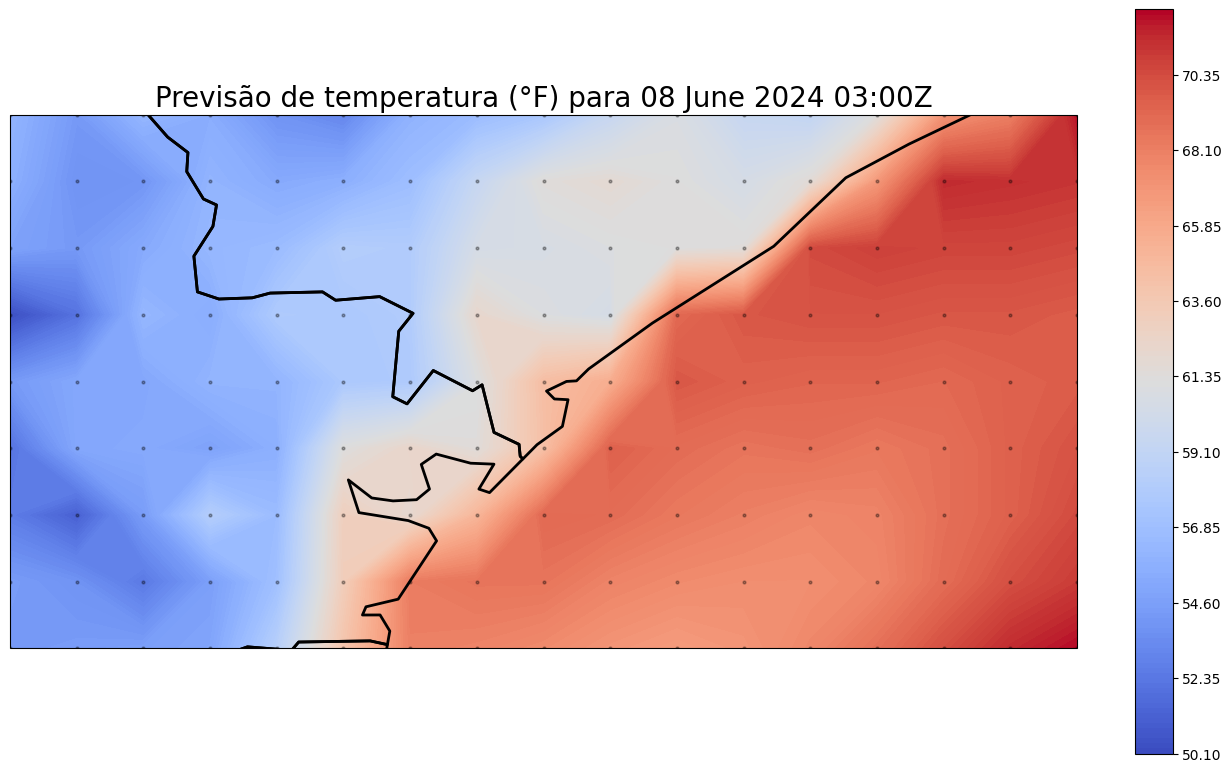

In [67]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

# Acessa o catálogo de dados GFS
best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

# Seleciona o primeiro dataset do catálogo
best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

# Cria uma consulta para obter dados
query = ncss.query()

# Define a área geográfica (caixa de latitude/longitude) e o tempo atual para a consulta
query.lonlat_box(north=-24, south=-26, east=-46, west=-50).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

# Obtém os dados com base na consulta
data = ncss.get_data(query)
print(list(data.variables))

# Extrai a variável de temperatura de superfície
temp_var = data.variables['Temperature_surface']

# As variáveis de tempo podem ser renomeadas em coleções GRIB. Melhor extrair do atributo de coordenadas na temperatura
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Obtém os valores reais dos dados e remove quaisquer dimensões de tamanho 1
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Converte o número de horas desde o tempo de referência para uma data real
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Converte a temperatura de Kelvin para Fahrenheit
temp_vals = temp_vals * 1.8 - 459.67

# Combina as latitudes e longitudes 1D em uma grade 2D de locais
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Cria uma nova figura
fig = plt.figure(figsize=(15, 12))

# Adiciona o mapa e define a extensão
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-50., -46., -26, -24])

# Adiciona limites dos estados ao mapa
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contorna a temperatura em cada latitude/longitude
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Adiciona uma barra de cores para mostrar a temperatura e reduz o tamanho dela
plt.colorbar(cf, ax=ax, fraction=0.032)

# Adiciona um título com o valor do tempo
ax.set_title(u'Previsão de temperatura (\u00b0F) para {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plota marcadores para cada latitude/longitude para mostrar os pontos de grade do GFS de 0,25 grau
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')

# Salva a figura em um arquivo
plt.savefig('previsao_temperatura.png', dpi=300, bbox_inches='tight')


In [49]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Carrega o shapefile
shapefile_path = 'caminho/para/seu/shapefile.shp'
shapefile = gpd.read_file(shapefile_path)

# Extrai a geometria do shapefile
geometry = shapefile.geometry.unary_union

# Cria uma figura e eixos
fig, ax = plt.subplots(figsize=(10, 10))

# Adiciona a geometria do shapefile à figura
shapefile.plot(ax=ax, facecolor='none', edgecolor='black')

# Adiciona seus dados ao eixo (substitua isso pelo seu código de plotagem)
# Exemplo:
# ax.plot(lon_vals, lat_vals, 'ro')

# Ajusta os limites do eixo com base na geometria do shapefile
minx, miny, maxx, maxy = geometry.bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Salva a figura
fig.savefig('figura_com_shapefile.png', dpi=300, bbox_inches='tight')

ModuleNotFoundError: No module named 'geopandas'